In [2]:
# import codecademylib3_seaborn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [92]:
df = pd.read_csv('tennis_stats.csv')
df['TotalMatches'] = df.Wins + df.Losses
df['PercentWins'] = df.Wins / df.TotalMatches
df['PercentWins'].fillna(value=0)
print(df.head(1))

        Player  Year  FirstServe  FirstServePointsWon  \
0  Pedro Sousa  2016        0.88                  0.5   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                   0.5   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   

   ...  ServiceGamesPlayed  ServiceGamesWon  TotalPointsWon  \
0  ...                   8              0.5            0.43   

   TotalServicePointsWon  Wins  Losses  Winnings  Ranking  TotalMatches  \
0                    0.5     1       2     39820      119             3   

   PercentWins  
0     0.333333  

[1 rows x 26 columns]


Text(0, 0.5, 'Mean Winnings')

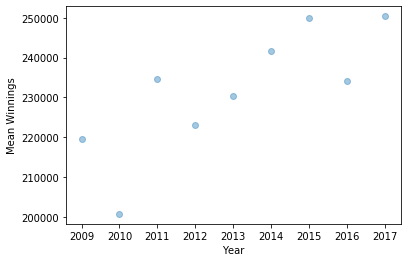

In [76]:
year_mean = df.groupby('Year').Winnings.mean().reset_index()
plt.figure
plt.scatter(year_mean.Year, year_mean.Winnings, alpha=0.4)
plt.xlabel('Year')
plt.ylabel('Mean Winnings')
# plt.show()

0.7722783859417024


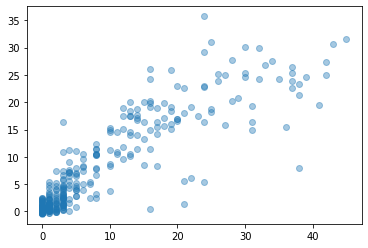

In [102]:
factor = df [['BreakPointsFaced']]
outcome = df[['Wins']]

factor_train, factor_test, outcome_train, outcome_test = \
train_test_split(factor, outcome, train_size=0.8, random_state = 4)

model = LinearRegression()
model.fit(factor_train, outcome_train)
print(model.score(factor_test, outcome_test))

y = model.predict(factor_test)
plt.figure
plt.scatter(outcome_test, y, alpha=0.4)
plt.show()